In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/football-manager-2020/datafm20.csv


In [50]:
# insert dependencies here
import csv



**read csv data**

In [51]:
# with open('../input/football-manager-2020/datafm20.csv') as csv_file:
#     reader = csv.reader(csv_file, delimiter=',')
#     line_count = 0
#     for row in reader:
#         if line_count == 0:
#             print(f'Column names are {", ".join(row)}')
#             line_count += 1
#         else:
#             print(f'\t{row[0]} works in the {row[1]} department, and was born in {row[2]}.')
#             line_count += 1
#     print(f'Processed {line_count} lines.')

In [52]:
# read the data
df = pd.read_csv('../input/football-manager-2020/datafm20.csv',
                 header=0)
df['paca_diff'] = df.PA - df.CA

In [53]:
# list the columns
columns = df.columns
columns

Index(['Unnamed: 0', 'Name', 'Position', 'Club', 'Division', 'Based', 'Nation',
       'Height', 'Weight', 'Age', 'Preferred Foot', 'Best Pos', 'Best Role',
       'Value', 'Wage', 'CA', 'PA', 'Wor', 'Vis', 'Thr', 'Tec', 'Tea', 'Tck',
       'Str', 'Sta', 'TRO', 'Ref', 'Pun', 'Pos', 'Pen', 'Pas', 'Pac', '1v1',
       'OtB', 'Nat', 'Mar', 'L Th', 'Lon', 'Ldr', 'Kic', 'Jum', 'Hea', 'Han',
       'Fre', 'Fla', 'Fir', 'Fin', 'Ecc', 'Dri', 'Det', 'Dec', 'Cro', 'Cor',
       'Cnt', 'Cmp', 'Com', 'Cmd', 'Bra', 'Bal', 'Ant', 'Agi', 'Agg', 'Aer',
       'Acc', 'paca_diff'],
      dtype='object')

In [54]:
# get data head
data_head = df.head()
data_head

,Unnamed: 0,Name,Position,Club,Division,Based,Nation,Height,Weight,Age,...,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc,paca_diff
0,0,Lionel Messi,"AM (RC), ST (C)",Barcelona,Spanish First Division,Spain (First Division),ARG,170,72,32,...,2,2,10,19,19,19,7,2,18,5
1,1,Cristiano Ronaldo,"AM (RL), ST (C)",Juventus,Italian Serie A,Italy (Serie A),POR,185,83,34,...,4,1,16,14,18,13,6,2,15,1
2,2,Kylian MbappÃ©,"AM (RL), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),FRA,178,73,20,...,2,1,12,14,17,16,6,4,20,15
3,3,Manuel Neuer,GK,FC Bayern,Bundesliga,Germany (Bundesliga),GER,192,90,33,...,12,17,14,14,19,15,8,14,13,17
4,4,Neymar,"M (L), AM (LC), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),BRA,175,68,27,...,3,1,14,14,16,18,10,4,17,4


In [55]:
# extract filter list value
clubs = df['Club']
clubs = clubs.drop_duplicates()
clubs.to_json('clubs.json', orient='records')

In [56]:
divisions = df['Division']
divisions = divisions.drop_duplicates()
divisions.to_json('divisions.json', orient='records')

In [57]:
nations = df['Nation']
nations = nations.drop_duplicates()
nations.to_json('nations.json', orient='records')

In [58]:
positions = df['Position']
positions = positions.drop_duplicates()
positions.to_json('nations.json', orient='records')

In [59]:
# list only primary attributes
preview_df = pd.DataFrame(df,
                         columns=[
                             'Name',
                             'Club',
                             'Preferred Foot',
                             'Position',
                             'Age',
                             'Value',
                             'Wage',
                             'Division',
                             'Based',
                             'Nation',
                             'Height', 
                             'Weight',
                             'CA',
                             'PA',
                             'paca_diff'
                         ]
                         )

preview_df

,Name,Club,Preferred Foot,Position,Age,Value,Wage,Division,Based,Nation,Height,Weight,CA,PA,paca_diff
0,Lionel Messi,Barcelona,Left,"AM (RC), ST (C)",32,73000000,1200000,Spanish First Division,Spain (First Division),ARG,170,72,195,200,5
1,Cristiano Ronaldo,Juventus,Either,"AM (RL), ST (C)",34,31000000,950000,Italian Serie A,Italy (Serie A),POR,185,83,195,196,1
2,Kylian MbappÃ©,Paris SG,Right,"AM (RL), ST (C)",20,86000000,375000,Ligue 1 Conforama,France (Ligue 1 Conforama),FRA,178,73,181,196,15
3,Manuel Neuer,FC Bayern,Either,GK,33,44000000,250000,Bundesliga,Germany (Bundesliga),GER,192,90,176,193,17
4,Neymar,Paris SG,Right,"M (L), AM (LC), ST (C)",27,91000000,600000,Ligue 1 Conforama,France (Ligue 1 Conforama),BRA,175,68,186,190,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144745,Yuan Jinxing,Unknown,Right Only,ST (C),41,0,0,Unknown,China,CHN,169,81,3,3,0
144746,Aizudin Abdul Rahman,BSRC,Right Only,M (C),24,0,0,Bruneian Premier League,Brunei (Premier League),BRU,180,69,2,2,0
144747,Berlin Jean-Gilles,CS Monteuil,Right Only,ST (C),32,300,6,PremiÃ¨re Ligue de soccer du QuÃ©bec,Canada (PLSQ),HAI,180,79,2,2,0
144748,Frederik van Hauen,Skovshoved,Right Only,M (C),19,0,0,2. Division,Denmark (2. Division),DEN,195,85,1,2,1


In [60]:
# wonderkid U21 players w/ market value <= 15mil pound
wdkit_df = preview_df
# filter by
filters = preview_df[(preview_df.Age <= 21)]
filters = filters[(filters.Value <= 15000000)]
top_500_wdkit = filters.head(1000)

top_500_wdkit_result = top_500_wdkit.sort_values(by='PA', ascending=False)
top_500_wdkit_result

,Name,Club,Preferred Foot,Position,Age,Value,Wage,Division,Based,Nation,Height,Weight,CA,PA,paca_diff
24,Youssoufa Moukoko,Borussia Dortmund,Left,ST (C),14,1600000,55,Bundesliga,Germany (Bundesliga),GER,179,72,115,183,68
28,Rodrygo,R. Madrid,Right,"AM (L), ST (C)",18,6000000,71000,Spanish First Division,Spain (First Division),BRA,171,62,130,182,52
39,Giovanni Reyna,Borussia Dortmund,Right,M/AM (LC),16,4900000,55,Bundesliga,Germany (Bundesliga),USA,183,76,132,180,48
47,Kai Havertz,Chelsea,Left,M/AM (C),20,0,170000,English Premier Division,England (Premier Division),GER,186,77,153,180,27
49,Sergio GÃ³mez,Huesca,Left,M/AM (LC),18,2000000,13250,Spanish First Division,Spain (First Division),ESP,171,68,120,179,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3043,Alpha Dionkou,Man City,Right Only,D/WB (R),17,135000,5000,English Premier Division,England (Premier Division),SEN,183,75,79,141,62
3040,Alexis Flips,Reims,Right,AM (R),19,650000,5000,Ligue 1 Conforama,France (Ligue 1 Conforama),FRA,175,65,106,141,35
3037,Aldair Fuentes,Alianza,Right Only,"D (C), DM, M (C)",21,275000,1800,Peruvian First Division,Peru (First Division),PER,193,80,118,141,23
3031,Aaron Ramsey,Aston Villa,Right,M/AM (C),16,50000,120,English Premier Division,England (Premier Division),ENG,180,61,70,141,71


extension from above shell

In [61]:
top_500_wdkit_result.head(20)

,Name,Club,Preferred Foot,Position,Age,Value,Wage,Division,Based,Nation,Height,Weight,CA,PA,paca_diff
24,Youssoufa Moukoko,Borussia Dortmund,Left,ST (C),14,1600000,55,Bundesliga,Germany (Bundesliga),GER,179,72,115,183,68
28,Rodrygo,R. Madrid,Right,"AM (L), ST (C)",18,6000000,71000,Spanish First Division,Spain (First Division),BRA,171,62,130,182,52
39,Giovanni Reyna,Borussia Dortmund,Right,M/AM (LC),16,4900000,55,Bundesliga,Germany (Bundesliga),USA,183,76,132,180,48
47,Kai Havertz,Chelsea,Left,M/AM (C),20,0,170000,English Premier Division,England (Premier Division),GER,186,77,153,180,27
49,Sergio GÃ³mez,Huesca,Left,M/AM (LC),18,2000000,13250,Spanish First Division,Spain (First Division),ESP,171,68,120,179,59
56,Naci ÃnÃ¼var,Ajax,Right,"M (C), AM (LC), ST (C)",16,325000,85,Eredivisie,Holland (Eredivisie),NED,168,60,101,178,77
59,Rayan Cherki,OL,Either,"AM (RLC), ST (C)",15,175000,60,Ligue 1 Conforama,France (Ligue 1 Conforama),FRA,177,71,92,177,85
64,Troy Parrott,Ipswich,Right,ST (C),17,7000000,10000,Sky Bet League One,England (Sky Bet League One),IRL,183,73,120,176,56
75,Ravil Tagir,AltÄ±nordu,Left,D (C),16,575000,3900,Turkish 1. League,Turkey (1. League),TUR,182,70,101,175,74
77,Ryan Gravenberch,Ajax,Right,"DM, M (C), AM (LC)",17,7250000,2800,Eredivisie,Holland (Eredivisie),NED,190,75,134,175,41


In [62]:
# U21 players with closes PA & CA diff
pa_ca_diff = top_500_wdkit_result
pa_ca_diff['paca_diff'] = pa_ca_diff.PA - pa_ca_diff.CA
pa_ca_diff.sort_values(by='paca_diff', ascending=False)

,Name,Club,Preferred Foot,Position,Age,Value,Wage,Division,Based,Nation,Height,Weight,CA,PA,paca_diff
154,David De la VÃ­bora,R. Madrid,Left,D/WB/M (L),16,14000,300,Spanish First Division,Spain (First Division),ESP,168,55,71,169,98
1988,Leo Castledine,Chelsea,Right,M/AM (C),14,0,120,English Premier Division,England (Premier Division),ENG,181,64,50,146,96
288,Thierry Small,Everton,Left,D/WB (L),14,41000,120,English Premier Division,England (Premier Division),ENG,177,65,75,165,90
598,James McAtee,Man City,Left Only,AM (RLC),16,50000,120,English Premier Division,England (Premier Division),ENG,176,63,70,158,88
323,Ãlex Padilla,A. Bilbao,Right,GK,15,68000,55,Spanish First Division,Spain (First Division),ESP,186,67,76,163,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,NicolÃ¡s GonzÃ¡lez,VfB Stuttgart,Left,"M/AM (RL), ST (C)",21,3700000,16500,Bundesliga,Germany (Bundesliga),ARG,180,67,134,145,11
2266,Marcus Thuram,Borussia M'gladbach,Right,"M/AM (L), ST (C)",21,7250000,30000,Bundesliga,Germany (Bundesliga),FRA,192,88,135,145,10
2769,Riqui Puig,Barcelona,Right,M/AM (C),19,5750000,5500,Spanish First Division,Spain (First Division),ESP,169,56,135,143,8
1983,Yeferson Soteldo,Santos,Either,"AM (RL), ST (C)",21,10000000,10750,Brazilian National First Division,Brazil (First Division),VEN,160,63,140,146,6


In [63]:
# player comparison
# 'Bernd Leno','Aaron Ramsdale', 'RÃºnar Alex RÃºnarsson', 'Karl Jakob Hein', 'Arthur Okonkwo', 'Emiliano MartÃ­nez'
idx1 = df.index[df['Name'] == 'Bernd Leno'].tolist()
idx2 = df.index[df['Name'] == 'Aaron Ramsdale'].tolist()
idx3 = df.index[df['Name'] == 'RÃºnar Alex RÃºnarsson'].tolist()
idx4 = df.index[df['Name'] == 'Karl Jakob Hein'].tolist()
idx5 = df.index[df['Name'] == 'Arthur Okonkwo'].tolist()
idx6 = df.index[df['Name'] == 'Emiliano MartÃ­nez'].tolist()

In [64]:
comparison = pd.DataFrame(preview_df, index=[idx1[0], idx2[0], idx3[0], idx4[0], idx5[0], idx6[0]])
comparison

,Name,Club,Preferred Foot,Position,Age,Value,Wage,Division,Based,Nation,Height,Weight,CA,PA,paca_diff
328,Bernd Leno,Arsenal,Right,GK,27,29000000,100000,English Premier Division,England (Premier Division),GER,190,83,151,163,12
1568,Aaron Ramsdale,Sheff Utd,Right,GK,21,15000000,51000,English Premier Division,England (Premier Division),ENG,191,65,135,148,13
9687,RÃºnar Alex RÃºnarsson,Arsenal,Right,GK,24,5250000,68000,English Premier Division,England (Premier Division),ISL,186,76,125,130,5
2720,Karl Jakob Hein,Arsenal,Right,GK,17,22500,1000,English Premier Division,England (Premier Division),EST,189,82,68,143,75
10071,Arthur Okonkwo,Arsenal,Right,GK,17,18750,1000,English Premier Division,England (Premier Division),ENG,196,90,70,129,59
2114,Emiliano MartÃ­nez,Aston Villa,Right,GK,26,18750000,52000,English Premier Division,England (Premier Division),ARG,193,85,140,145,5


In [65]:
# df[df['Club'] == 'Aston Villa']

In [66]:
# list of mature player w/ market value <= 30mil, aged > 25 && aged < 31
mature_players = preview_df
filters = preview_df[(preview_df.Age <= 31) & (preview_df.Age >= 25)]
filters = filters[(filters.Value <= 30000000)]
filters = filters[(filters.CA > 140)]

ca_above_140 = filters
ca_above_140

,Name,Club,Preferred Foot,Position,Age,Value,Wage,Division,Based,Nation,Height,Weight,CA,PA,paca_diff
25,Alexis SÃ¡nchez,Inter,Right,"AM (RLC), ST (C)",30,25000000,200000,Italian Serie A,Italy (Serie A),CHI,169,70,151,182,31
43,Mesut Ãzil,FenerbahÃ§e,Left,AM (RLC),30,12250000,105000,Turkish Super League,Turkey (Super League),GER,180,72,143,180,37
113,Mateo Kovacic,Chelsea,Right,"DM, M/AM (C)",25,0,150000,English Premier Division,England (Premier Division),CRO,178,78,164,172,8
135,Marek Hamsik,IFK GÃ¶teborg,Either,M/AM (C),31,1500000,3500,Swedish Premier Division,Sweden (Premier Division),SVK,183,79,150,170,20
186,Diego Costa,Unknown,Either,ST (C),30,0,0,Unknown,Spain,ESP,186,87,156,168,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,Ayoze PÃ©rez,Leicester,Right,"M (R), AM (RC), ST (C)",25,25000000,80000,English Premier Division,England (Premier Division),ESP,178,72,141,142,1
2917,Josef MartÃ­nez,Atlanta United,Right,"AM (L), ST (C)",26,5750000,45500,Major League Soccer,U.S.A. (MLS),VEN,173,76,141,142,1
2935,LukÃ¡s HradeckÃ½,Bayer 04,Right,GK,29,10750000,75000,Bundesliga,Germany (Bundesliga),FIN,190,80,142,142,0
2968,Munas Dabbur,TSG Hoffenheim,Right,ST (C),27,14250000,58000,Bundesliga,Germany (Bundesliga),ISR,182,76,142,142,0


In [67]:
# export data to JSON
df.to_json('full_version.json', orient='records')

# full_version preview
preview_df.to_json('previews.json', orient='records')

In [68]:
# mature player U32 A24 & CA min 140
ca_above_140.to_json('matures.json', orient='records')
# wonderkid
top_500_wdkit_result.to_json('wonderkids.json', orient='records')

**Get the Visualization**

Let's explore the wonderkids datasets


In [69]:
# import matplotlib
import matplotlib
import matplotlib.pyplot as plt 
import numpy

In [70]:
# U21 players MV < 15mil -> top 1000
# extract respective age, MV, Wages, CA, PA data into an array or list

wdkit_age = list(top_500_wdkit_result['Age'])
wdkit_MV = list(top_500_wdkit_result['Value'])
wdkit_wage = list(top_500_wdkit_result['Wage'])
wdkit_CA = list(top_500_wdkit_result['CA'])
wdkit_PA = list(top_500_wdkit_result['PA'])
wdkit_height = list(top_500_wdkit_result['Height'])
wdkit_weight = list(top_500_wdkit_result['Weight'])

# sort ascending
sort_age = np.sort(np.array(wdkit_age))
sort_mv = np.sort(np.array(wdkit_MV))
sort_wage = np.sort(np.array(wdkit_wage))
sort_ca = np.sort(np.array(wdkit_CA))
sort_pa = np.sort(np.array(wdkit_PA))
sort_height = np.sort(np.array(wdkit_height))
sort_weight = np.sort(np.array(wdkit_weight))

In [71]:
# get avegare age, MV, Wages, CA, PA
avg_age = numpy.mean(wdkit_age)
avg_mv = numpy.mean(wdkit_MV)
avg_wage = numpy.mean(wdkit_wage)
avg_CA = numpy.mean(wdkit_CA)
avg_PA = numpy.mean(wdkit_PA)
avg_height = numpy.mean(wdkit_height)
avg_weight = numpy.mean(wdkit_weight)

print('Average age: ', avg_age)
print('Average value (£): ', avg_mv)
print('Average wage (£ / weekly): ', avg_wage)
print('Average curr ability: ', avg_CA)
print('Average potential ability: ', avg_PA)
print('* Mbappe, Haland have PA around 180s')
print('Average height: ', avg_height)
print('Average weight: ', avg_weight)
print('highest: ', max(wdkit_height))
print('weighest: ', max(wdkit_weight))

Average age:  18.79
Average value (£):  2422014.79
Average wage (£ / weekly):  8523.015
Average curr ability:  110.446
Average potential ability:  150.014
* Mbappe, Haland have PA around 180s
Average height:  179.667
Average weight:  71.675
highest:  198
weighest:  98


In [72]:
# avg of those if we group them per league, per country, per position
# per nation
per_nation = top_500_wdkit_result.groupby(['Nation'])
count_per_nation = per_nation.count()
count_per_nation

,Name,Club,Preferred Foot,Position,Age,Value,Wage,Division,Based,Height,Weight,CA,PA,paca_diff
Nation,,,,,,,,,,,,,,
ALB,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ALG,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ARG,69,69,69,69,69,69,69,69,69,69,69,69,69,69
AUS,2,2,2,2,2,2,2,2,2,2,2,2,2,2
AUT,10,10,10,10,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USA,12,12,12,12,12,12,12,12,12,12,12,12,12,12
UZB,1,1,1,1,1,1,1,1,1,1,1,1,1,1
VEN,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [73]:
avg_per_nation = per_nation.mean().round(2)
avg_per_nation['Count'] = count_per_nation['Name']
avg_per_nation['Nation'] = count_per_nation.index
avg_per_nation

,Age,Value,Wage,Height,Weight,CA,PA,paca_diff,Count,Nation
Nation,,,,,,,,,,
ALB,19.00,4400000.00,8000.00,185.00,75.00,128.00,151.00,23.00,1,ALB
ALG,21.00,13750000.00,46000.00,175.00,70.00,142.00,163.00,21.00,1,ALG
ARG,18.16,1760833.33,4910.29,176.58,69.16,107.42,148.91,41.49,69,ARG
AUS,19.50,3700000.00,16200.00,179.00,70.00,113.50,148.00,34.50,2,AUS
AUT,19.70,2625000.00,9123.00,180.10,72.70,118.10,150.10,32.00,10,AUT
...,...,...,...,...,...,...,...,...,...,...
USA,18.83,2530999.92,18992.08,179.08,72.58,113.92,150.42,36.50,12,USA
UZB,17.00,725.00,55.00,166.00,57.00,100.00,145.00,45.00,1,UZB
VEN,21.00,6881250.00,11100.00,179.75,75.50,132.25,149.25,17.00,4,VEN


In [74]:
avg_per_nation.to_json('avg_nation.json', orient='records')

In [75]:
# group by division
per_div = top_500_wdkit_result.groupby(['Division'])
count_per_div = per_div.count()
avg_per_div = per_div.mean().round(2)
avg_per_div['Count'] = count_per_div['Name']
avg_per_div['Division'] = count_per_div.index
avg_per_div

,Age,Value,Wage,Height,Weight,CA,PA,paca_diff,Count,Division
Division,,,,,,,,,,
3. Liga,19.00,2000000.00,83000.00,184.00,78.00,119.00,163.00,44.00,1,3. Liga
3F Superliga,19.36,1381022.73,5513.64,179.45,70.73,116.27,148.45,32.18,11,3F Superliga
Argentine Metropolitan B Zone,16.00,225000.00,1000.00,182.00,68.00,88.00,145.00,57.00,1,Argentine Metropolitan B Zone
Argentine Premier Division,18.02,1163000.00,2088.50,175.96,68.30,105.36,148.02,42.66,50,Argentine Premier Division
Argentine Second Division,17.20,457000.00,1086.00,180.20,72.60,97.80,149.40,51.60,5,Argentine Second Division
...,...,...,...,...,...,...,...,...,...,...
USSL Division One Western Conference,21.00,240000.00,3300.00,179.00,73.00,104.00,157.00,53.00,1,USSL Division One Western Conference
Ukrainian Premier League,19.71,4144117.65,6186.76,176.41,69.06,118.53,152.47,33.94,17,Ukrainian Premier League
Unknown,18.83,18875.00,120.83,177.00,69.00,91.67,149.00,57.33,6,Unknown


In [76]:
avg_per_div.to_json('avg_division.json', orient='records')

In [77]:
# group bby club
per_club = top_500_wdkit_result.groupby(['Club'])
count_per_club = per_club.count()
avg_per_club = per_club.mean().round(2)
avg_per_club['Count'] = count_per_club['Name']
avg_per_club['Club'] = avg_per_club.index
avg_per_club

,Age,Value,Wage,Height,Weight,CA,PA,paca_diff,Count,Club
Club,,,,,,,,,,
1. FC KÃ¶ln,19.50,4850000.00,5100.00,176.50,69.50,120.0,149.00,29.00,2,1. FC KÃ¶ln
A. Bilbao,17.33,1520500.00,4817.50,179.50,68.67,108.5,152.33,43.83,6,A. Bilbao
A. Bilbao C,19.00,725000.00,3400.00,188.00,73.00,110.0,152.00,42.00,1,A. Bilbao C
A. Madrid,18.00,403000.00,2012.50,182.50,73.50,93.0,149.50,56.50,2,A. Madrid
A. Madrid B,19.00,445000.00,2350.00,189.50,78.50,104.0,151.50,47.50,2,A. Madrid B
...,...,...,...,...,...,...,...,...,...,...
Zaragoza,16.00,34000.00,325.00,169.00,55.00,70.0,149.00,79.00,1,Zaragoza
Zenit,21.00,8500000.00,40000.00,180.00,75.00,131.0,155.00,24.00,1,Zenit
Zorya,21.00,887500.00,1087.50,180.00,69.50,115.0,147.50,32.50,2,Zorya


In [78]:
avg_per_club.to_json('avg_club.json', orient='records')

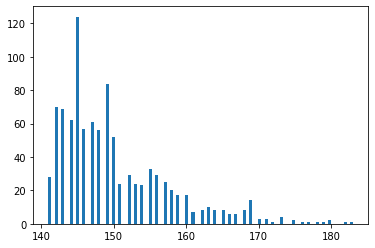

In [79]:
# data distribution
plt.hist(wdkit_PA, 100)
plt.show()

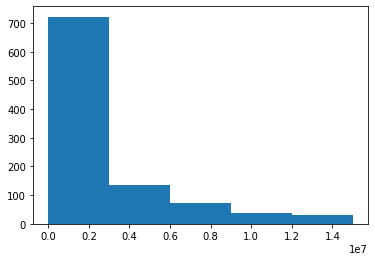

In [80]:
plt.hist(wdkit_MV, 5)
plt.show()

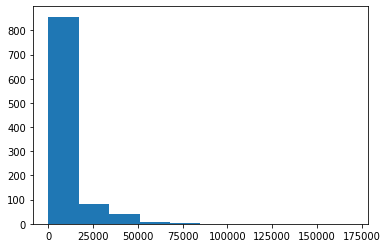

In [81]:
plt.hist(wdkit_wage, 10)
plt.show()

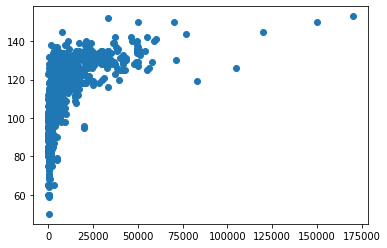

In [82]:
plt.scatter(wdkit_wage, wdkit_CA)
plt.show()

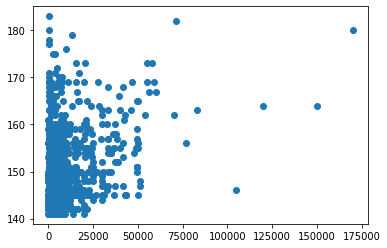

In [83]:
plt.scatter(wdkit_wage, wdkit_PA)
plt.show()